In [ ]:
import os
import IPython
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/merge_15min_filled.csv.tar.gz')
print(zip_path)
df = pd.read_csv(zip_path, compression='tar')

/Users/watcharinsarachai/.keras/datasets/merge_15min_filled.csv.tar.gz


In [4]:
df.head(3)

,datetime,ambient_temperature,current_power,current_value_of_consumption,external_energy_supply,grid_feed_in,internal_power_supply,self_consumption,temperature_measurement,total_irradiation,...,sp,sshf,ssr,ssrd,str,strd,t2m,tp,u10,v10
0,2021-11-06 11:15:00,30.288889,46519.355556,37280.422222,0.0,9238.933333,37280.422222,37280.422222,58.022222,798.444444,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
1,2021-11-06 11:30:00,30.076923,47600.714286,39472.626374,0.0,9397.756098,39132.406593,39132.406593,58.263736,812.571429,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2,2021-11-06 11:45:00,30.629213,47056.988764,32669.393258,0.0,14387.595506,32669.393258,32669.393258,57.235955,807.224719,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603


In [5]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values")

In [6]:
df.pop('current_value_of_consumption')
df.pop('external_energy_supply')
df.pop('grid_feed_in')
df.pop('internal_power_supply')
df.pop('self_consumption')
df.head(2)

,datetime,ambient_temperature,current_power,temperature_measurement,total_irradiation,utci_mean,cc,q,r,t,...,sp,sshf,ssr,ssrd,str,strd,t2m,tp,u10,v10
0,2021-11-06 11:15:00,30.288889,46519.355556,58.022222,798.444444,302.213731,0.0,0.011205,63.667006,293.487773,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
1,2021-11-06 11:30:00,30.076923,47600.714286,58.263736,812.571429,302.213731,0.0,0.011205,63.667006,293.487773,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603


In [7]:
# Check what years exist in your dataset
date_col = 'datetime'  # Replace with your actual column name

df = df.sort_values(date_col).reset_index(drop=True)

# Ensure timestamp column is datetime type
if df[date_col].dtype != 'datetime64[ns]':
    df[date_col] = pd.to_datetime(df[date_col])

# Sort by time if it exists
df.index = df[date_col]
df.pop(date_col)
df = df.sort_index()
print(df.shape)

df.head(5)

(138238, 23)


,ambient_temperature,current_power,temperature_measurement,total_irradiation,utci_mean,cc,q,r,t,u,...,sp,sshf,ssr,ssrd,str,strd,t2m,tp,u10,v10
datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-06 11:15:00,30.288889,46519.355556,58.022222,798.444444,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2021-11-06 11:30:00,30.076923,47600.714286,58.263736,812.571429,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2021-11-06 11:45:00,30.629213,47056.988764,57.235955,807.224719,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2021-11-06 12:00:00,31.021978,48415.835165,56.846154,817.527473,299.223424,0.0,0.011366,65.189689,293.320821,0.497185,...,96169.262638,-1.129156e+06,1.577950e+07,1.890126e+07,-4.231913e+06,1.548664e+07,297.380576,4.261732e-07,0.378476,0.374936
2021-11-06 12:15:00,31.831461,49345.404494,55.842697,816.651685,299.223424,0.0,0.011366,65.189689,293.320821,0.497185,...,96169.262638,-1.129156e+06,1.577950e+07,1.890126e+07,-4.231913e+06,1.548664e+07,297.380576,4.261732e-07,0.378476,0.374936


In [8]:
mapping = {
  'ambient_temperature': 'ambient_temperature',
  'current_power': 'current_power',
  'temperature_measurement': 'module_temperature',
  'total_irradiation': 'total_irradiation',
  'utci_mean': 'utci_mean',
  'cc': 'cloud_cover',
  'q': 'specific_humidity',
  'r': 'relative_humidity',
  't': 'air_temperature',
  'u': 'wind_u_component',
  'v': 'wind_v_component',
  'fal': 'forecast_accumulated_liquid',
  'slhf': 'surface_latent_heat_flux',
  'sp': 'surface_pressure',
  'sshf': 'sensible_heat_flux',
  'ssr': 'surface_solar_radiation',
  'ssrd': 'surface_solar_radiation_direct',
  'str': 'surface_thermal_radiation',
  'strd': 'surface_thermal_radiation_direct',
  't2m': 'two_m_temperature',
  'tp': 'total_precipitation',
  'u10': 'u10_wind',
  'v10': 'v10_wind',
}
df = df.rename(columns=mapping)

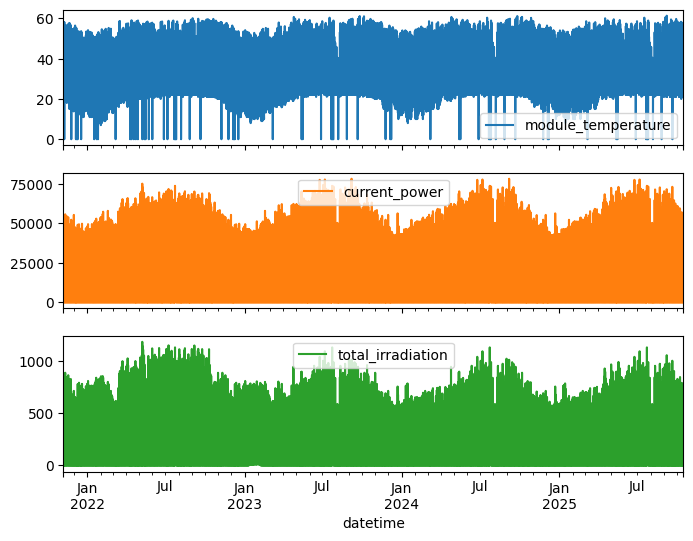

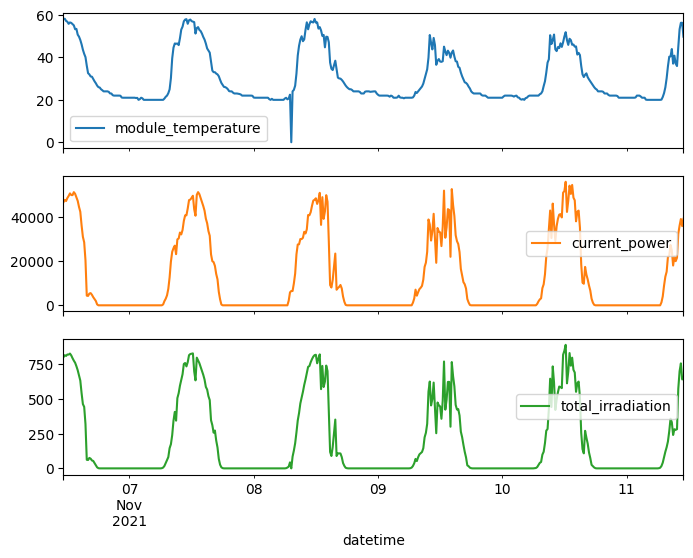

In [9]:
plot_cols = ['module_temperature', 'current_power', 'total_irradiation']
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = df.index[:480]
_ = plot_features.plot(subplots=True)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ambient_temperature,138238.0,2.583504e+01,5.150631e+00,0.000000e+00,2.310989e+01,2.600000e+01,2.913483e+01,4.001099e+01
current_power,138238.0,1.305281e+04,1.815287e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.526932e+04,7.825989e+04
module_temperature,138238.0,2.972648e+01,1.188849e+01,0.000000e+00,2.200000e+01,2.506593e+01,3.835227e+01,6.137363e+01
total_irradiation,138238.0,1.558014e+02,2.449202e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.658961e+02,1.183055e+03
utci_mean,138238.0,2.841147e+02,6.759370e+01,0.000000e+00,2.950198e+02,2.991934e+02,3.050845e+02,3.170079e+02
cloud_cover,138238.0,4.359805e-02,1.272938e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.337181e-02,1.000000e+00
specific_humidity,138238.0,1.155237e-02,3.095912e-03,0.000000e+00,9.139406e-03,1.240514e-02,1.411958e-02,1.746720e-02
relative_humidity,138238.0,7.105046e+01,1.935290e+01,0.000000e+00,5.918899e+01,7.650769e+01,8.576274e+01,1.018295e+02
air_temperature,138238.0,2.912035e+02,1.826893e+01,0.000000e+00,2.909458e+02,2.922866e+02,2.937318e+02,3.033400e+02
wind_u_component,138238.0,1.579913e+00,3.781639e+00,-1.205189e+01,-1.115728e+00,1.584174e+00,4.060733e+00,1.637189e+01


In [11]:
print(df.index.year.unique())
print(df.index.year.value_counts())

Index([2021, 2022, 2023, 2024, 2025], dtype='int32', name='datetime')
datetime
2024    35136
2022    35040
2023    35040
2025    27691
2021     5331
Name: count, dtype: int64


In [ ]:
df_proced = df.copy()
df_proced = df_proced.ffill() # forward fill to impute missing values
df_proced.head(3)

,ambient_temperature,current_power,module_temperature,total_irradiation,utci_mean,cloud_cover,specific_humidity,relative_humidity,air_temperature,wind_u_component,...,surface_pressure,sensible_heat_flux,surface_solar_radiation,surface_solar_radiation_direct,surface_thermal_radiation,surface_thermal_radiation_direct,two_m_temperature,total_precipitation,u10_wind,v10_wind
datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-06 11:15:00,30.288889,46519.355556,58.022222,798.444444,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2021-11-06 11:30:00,30.076923,47600.714286,58.263736,812.571429,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2021-11-06 11:45:00,30.629213,47056.988764,57.235955,807.224719,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603


In [ ]:
df_proced['hour'] = df_proced.index.hour
df_proced['year'] = df_proced.index.year
df_proced['month'] = df_proced.index.month
df_proced['day_of_month'] = df_proced.index.day
df_proced['day_of_week'] = df_proced.index.dayofweek  # 0=Monday, 6=Sunday
df_proced['is_weekend'] = (df_proced['day_of_week'] >= 5).astype(int)

df_proced['season'] = df_proced['month'] % 12 // 3 + 1  # 1=Winter, 2=Spring, 3=Summer, 4=Fall
df_proced['is_daytime'] = ((df_proced['hour'] >= 6) & (df_proced['hour'] <= 18)).astype(int)

In [13]:
mean = df_proced.mean()
std = df_proced.std()

df_proced = (df_proced - mean) / std

# Shift to non-negative values using Min-Max scaling
min_val = df_proced.min()
max_val = df_proced.max()
df_proced = (df_proced - min_val) / (max_val - min_val)

[Text(0, 0, 'ambient_temperature'),
 Text(1, 0, 'current_power'),
 Text(2, 0, 'module_temperature'),
 Text(3, 0, 'total_irradiation'),
 Text(4, 0, 'utci_mean'),
 Text(5, 0, 'cloud_cover'),
 Text(6, 0, 'specific_humidity'),
 Text(7, 0, 'relative_humidity'),
 Text(8, 0, 'air_temperature'),
 Text(9, 0, 'wind_u_component'),
 Text(10, 0, 'wind_v_component'),
 Text(11, 0, 'forecast_accumulated_liquid'),
 Text(12, 0, 'surface_latent_heat_flux'),
 Text(13, 0, 'surface_pressure'),
 Text(14, 0, 'sensible_heat_flux'),
 Text(15, 0, 'surface_solar_radiation'),
 Text(16, 0, 'surface_solar_radiation_direct'),
 Text(17, 0, 'surface_thermal_radiation'),
 Text(18, 0, 'surface_thermal_radiation_direct'),
 Text(19, 0, 'two_m_temperature'),
 Text(20, 0, 'total_precipitation'),
 Text(21, 0, 'u10_wind'),
 Text(22, 0, 'v10_wind'),
 Text(23, 0, 'hour'),
 Text(24, 0, 'year'),
 Text(25, 0, 'month'),
 Text(26, 0, 'day_of_month'),
 Text(27, 0, 'day_of_week'),
 Text(28, 0, 'is_weekend'),
 Text(29, 0, 'season'),
 Te

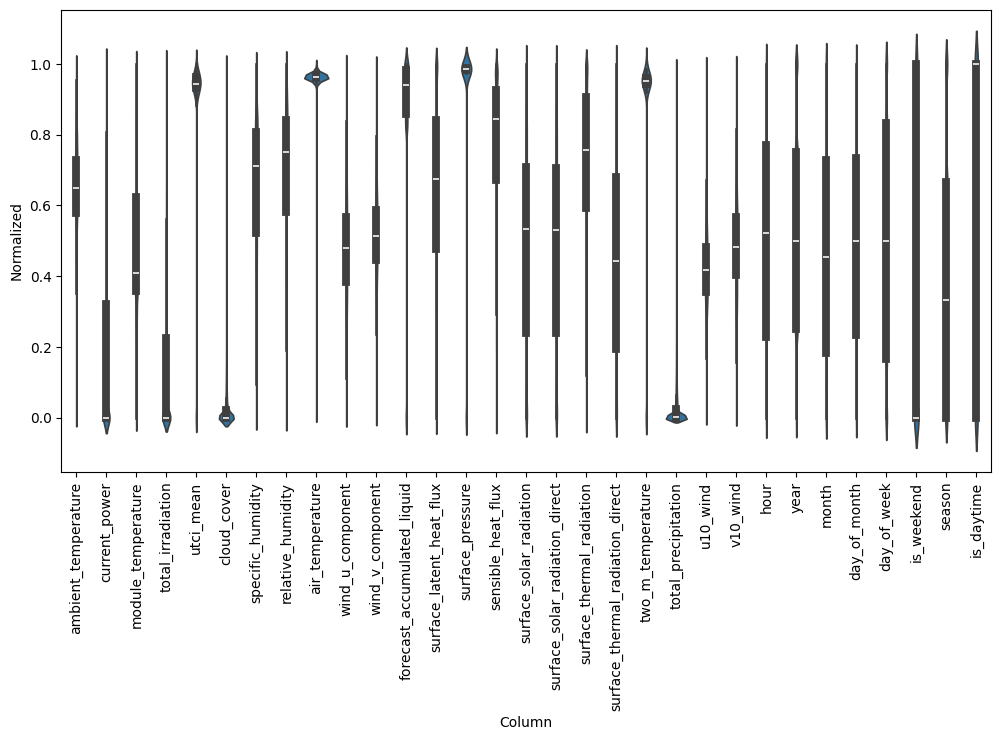

In [14]:
#df_std = (df - train_mean) / train_std
df_std = df_proced.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticks(range(len(df_proced.keys())))
ax.set_xticklabels(df_proced.keys(), rotation=90)

Text(0, 0.5, 'Forecast Accumulated Liquid')

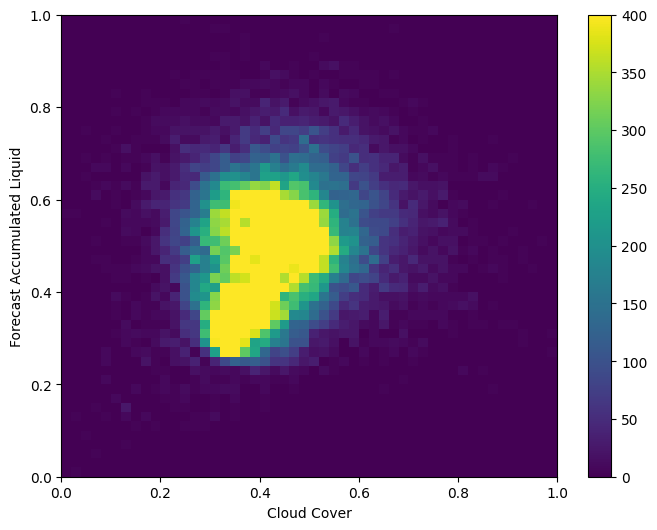

In [15]:
plt.hist2d(df_proced['u10_wind'], df_proced['v10_wind'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Cloud Cover')
plt.ylabel('Forecast Accumulated Liquid')

Text(0, 0.5, 'Forecast Accumulated Liquid')

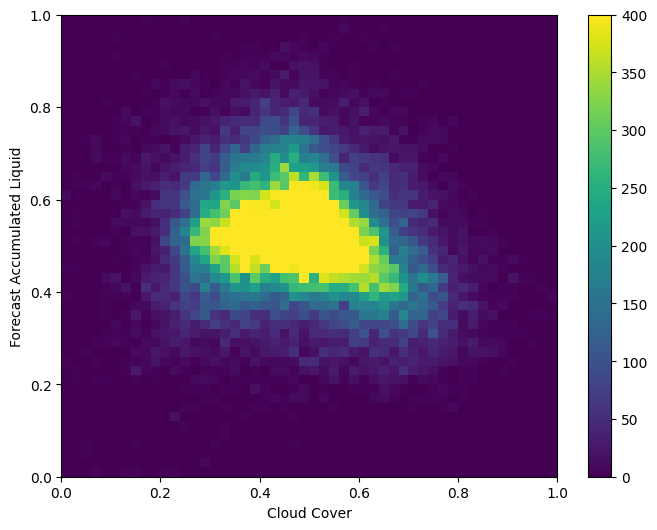

In [16]:
plt.hist2d(df_proced['wind_u_component'], df_proced['wind_v_component'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Cloud Cover')
plt.ylabel('Forecast Accumulated Liquid')

In [17]:
print(df_proced.index.min())
print(df_proced.index.max())

2021-11-06 11:15:00
2025-10-16 10:30:00


In [18]:
column_indices = {name: i for i, name in enumerate(df_proced.columns)}

n = len(df_proced)
test_df = df_proced[0:int(n*0.2)]
train_df = df_proced[int(n*0.2):int(n*0.8)]
val_df = df_proced[int(n*0.8):]

num_features = df_proced.shape[1]

print(f'Training set: {train_df.shape}')
print(f'Validation set: {val_df.shape}')
print(f'Test set: {test_df.shape}')

Training set: (82943, 31)
Validation set: (27648, 31)
Test set: (27647, 31)


In [19]:
print(f'Column indices: {column_indices}')
print(f"num_features: {num_features}")

Column indices: {'ambient_temperature': 0, 'current_power': 1, 'module_temperature': 2, 'total_irradiation': 3, 'utci_mean': 4, 'cloud_cover': 5, 'specific_humidity': 6, 'relative_humidity': 7, 'air_temperature': 8, 'wind_u_component': 9, 'wind_v_component': 10, 'forecast_accumulated_liquid': 11, 'surface_latent_heat_flux': 12, 'surface_pressure': 13, 'sensible_heat_flux': 14, 'surface_solar_radiation': 15, 'surface_solar_radiation_direct': 16, 'surface_thermal_radiation': 17, 'surface_thermal_radiation_direct': 18, 'two_m_temperature': 19, 'total_precipitation': 20, 'u10_wind': 21, 'v10_wind': 22, 'hour': 23, 'year': 24, 'month': 25, 'day_of_month': 26, 'day_of_week': 27, 'is_weekend': 28, 'season': 29, 'is_daytime': 30}
num_features: 31


In [20]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
    self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='current_power', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      # plot input value
      plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      # plot label
      plt.plot(self.label_indices, labels[n, :, label_col_index], label='Labels', c='#2ca02c', marker='.', zorder=-9)
        
      if model is not None:
        predictions = model(inputs)
        plt.plot(self.label_indices, predictions[n, :, label_col_index], label='Predictions', c='#ff7f0e', marker='.', zorder=-8)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [15min]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds
    
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result
  
  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [21]:
wide_window = WindowGenerator(
    input_width=96, label_width=96, shift=1,
    label_columns=['current_power'])

wide_window

Total window size: 97
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96]
Label column name(s): ['current_power']

In [22]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:wide_window.total_window_size]),
                           np.array(train_df[100:100+wide_window.total_window_size]),
                           np.array(train_df[200:200+wide_window.total_window_size])])

example_inputs, example_labels = wide_window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 97, 31)
Inputs shape: (3, 96, 31)
Labels shape: (3, 96, 1)


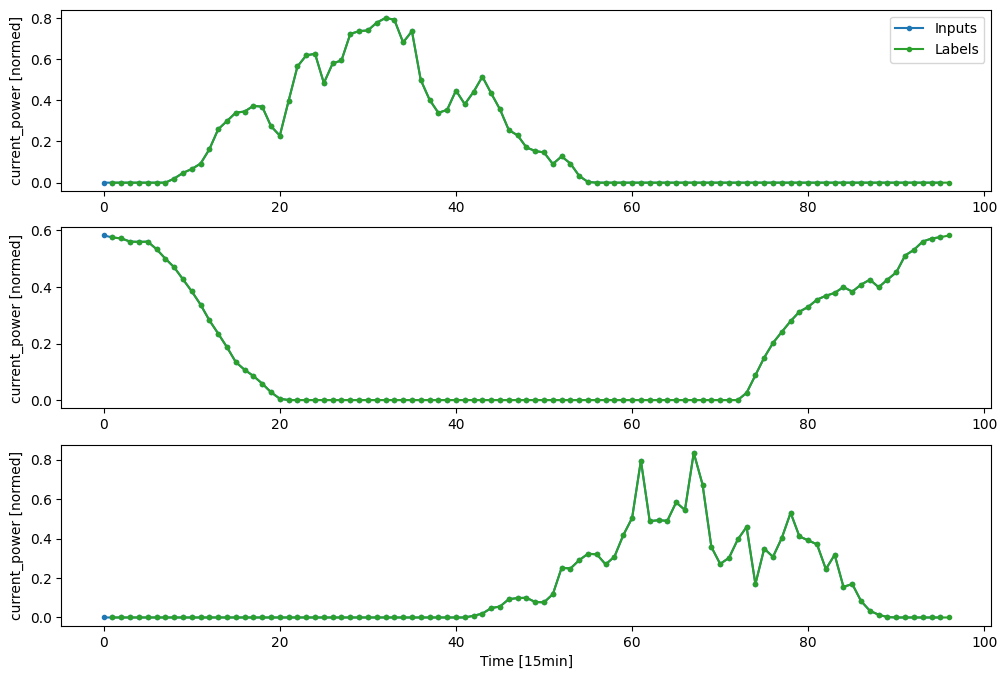

In [23]:
wide_window.plot()

In [24]:
# Each element is an (inputs, label) pair.
wide_window.train.element_spec

(TensorSpec(shape=(None, 96, 31), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 96, 1), dtype=tf.float32, name=None))

In [25]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 96, 31)
Labels shape (batch, time, features): (32, 96, 1)


In [26]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['current_power'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['current_power']

In [27]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 31)
Labels shape (batch, time, features): (32, 1, 1)


2025-12-06 20:44:30.195045: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [28]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

864/864 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 0.0035 - mean_absolute_error: 0.0269


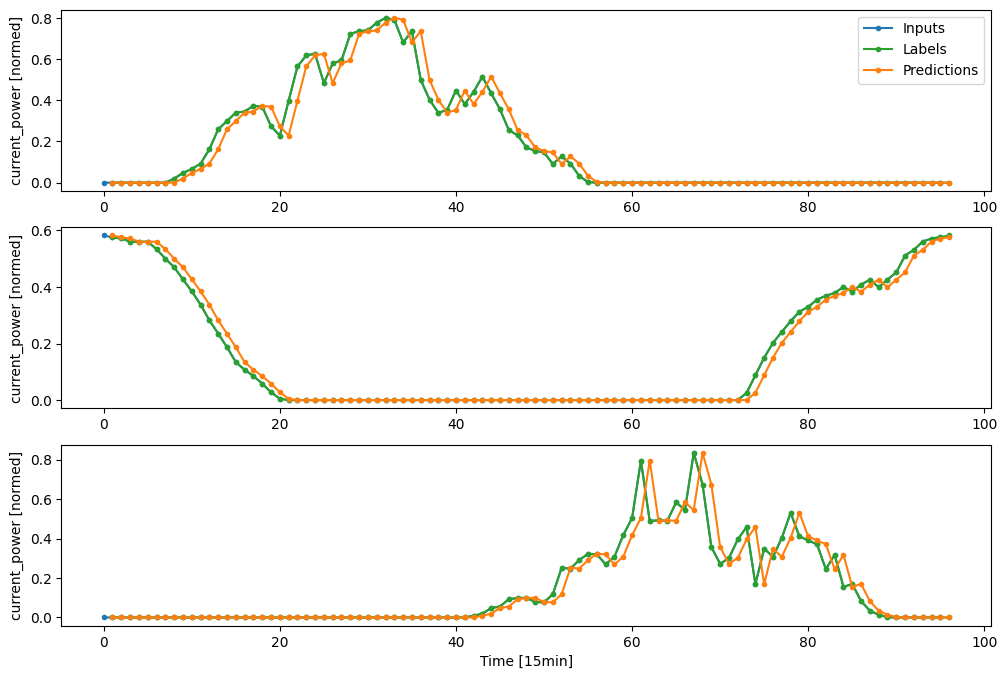

In [29]:
baseline = Baseline(label_index=column_indices['current_power'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['1-Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['1-Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)
wide_window.plot(baseline)

In [30]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [31]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 96, 31)
Output shape: (32, 96, 1)


In [32]:
MAX_EPOCHS = 50
LEARNING_RATE = 0.001

models_dir = 'src/jupyter_nb/experiments/datetime_models'

def fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
  
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

def load_or_train_model(model_name, model, window, is_custom=False):
  """
  Load model if it exists, otherwise train and save it.
  
  Args:
      model_name: Name of the model (e.g., 'linear_model')
      model: The Keras model object
      window: Training window
      is_custom: True for custom Model subclasses (saves weights only)
  
  Returns:
      Trained model
  """
  # Add appropriate extension based on model type
  if is_custom:
    model_filename = f"{model_name}.weights.h5"
  else:
    model_filename = f"{model_name}.keras"
  
  model_path = os.path.join(models_dir, model_filename)
  
  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Nadam(learning_rate=LEARNING_RATE),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  
  if os.path.exists(model_path):
    print(f"✓ Loading existing model: {model_name}")
    if is_custom:
      # For custom models, load weights only
      model.load_weights(model_path)
    else:
      # Use safe_mode=False to allow loading models with serializable layers
      model = tf.keras.models.load_model(model_path, safe_mode=False)
    return model
  else:
    print(f"→ Training model: {model_name}")
    history = fit(model, window)
    print(f"✓ Training complete: {model_name}")

    if not os.path.exists(models_dir):
        os.makedirs(models_dir)
        print(f"Created directory: {models_dir}")

    if is_custom:
      # For custom models, save weights only
      model.save_weights(model_path)
    else:
      model.save(model_path)
    
    print(f"✓ Model saved to {model_path}")
    return model

→ Training model: linear_model
Epoch 1/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0329 - mean_absolute_error: 0.1113 - val_loss: 0.0256 - val_mean_absolute_error: 0.1058
Epoch 2/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0036 - mean_absolute_error: 0.0347 - val_loss: 0.0210 - val_mean_absolute_error: 0.0909
Epoch 3/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0030 - mean_absolute_error: 0.0275 - val_loss: 0.0155 - val_mean_absolute_error: 0.0770
Epoch 4/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0028 - mean_absolute_error: 0.0260 - val_loss: 0.0128 - val_mean_absolute_error: 0.0705
Epoch 5/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0028 - mean_absolute_error: 0.0259 - val_loss: 0.0105 - val_mean_absolute_error: 0.0644
Epoch 6/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0028 - mean_absolute_error: 0.0258 - val_loss: 0.0089 - val_mean_absolute_error: 0.0597
Epoch 7/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - l

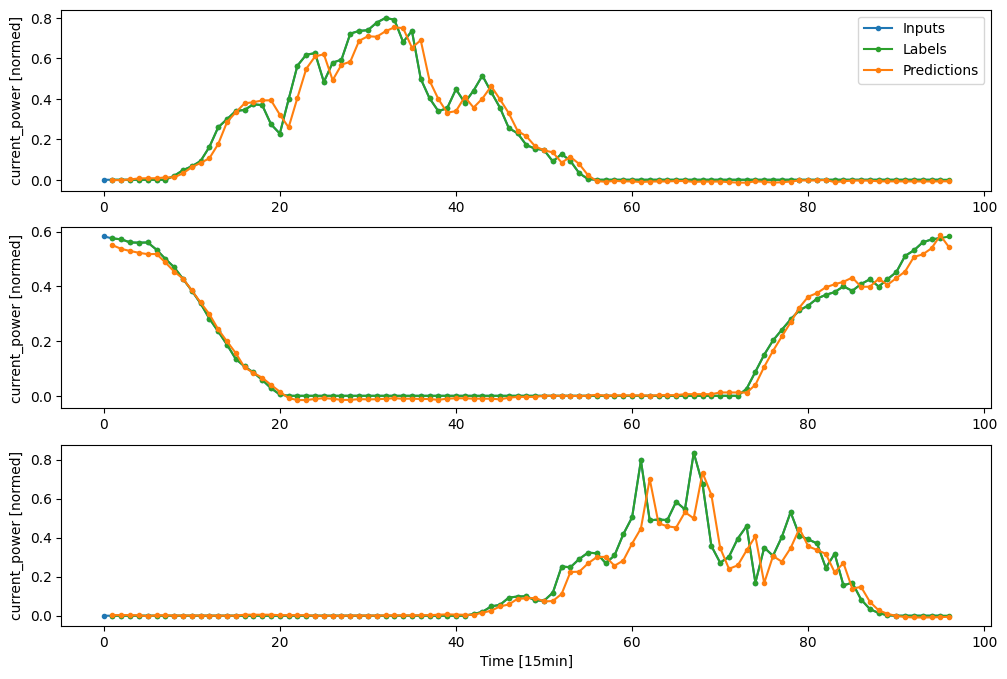

In [33]:
linear = load_or_train_model('linear_model', linear, wide_window)

val_performance['2-Linear'] = linear.evaluate(wide_window.val, return_dict=True)
performance['2-Linear'] = linear.evaluate(wide_window.test, verbose=0, return_dict=True)
wide_window.plot(linear)

In [34]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 96, 31)
Output shape: (32, 96, 1)


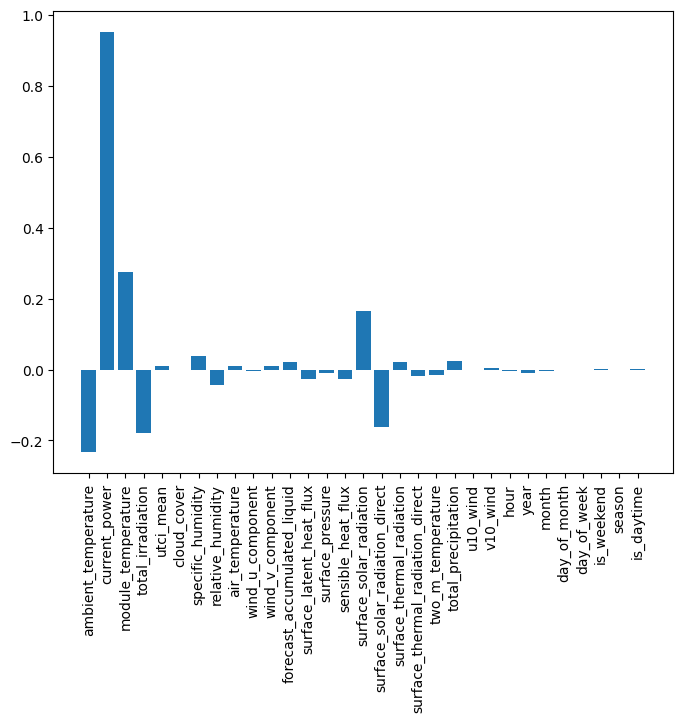

In [35]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

→ Training model: dense_model
Epoch 1/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0316 - val_loss: 0.0042 - val_mean_absolute_error: 0.0381
Epoch 2/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0257 - val_loss: 0.0041 - val_mean_absolute_error: 0.0383
Epoch 3/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0245 - val_loss: 0.0038 - val_mean_absolute_error: 0.0355
Epoch 4/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0238 - val_loss: 0.0036 - val_mean_absolute_error: 0.0331
Epoch 5/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0232 - val_loss: 0.0034 - val_mean_absolute_error: 0.0300
Epoch 6/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0227 - val_loss: 0.0035 - val_mean_absolute_error: 0.0305
Epoch 7/50
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/st

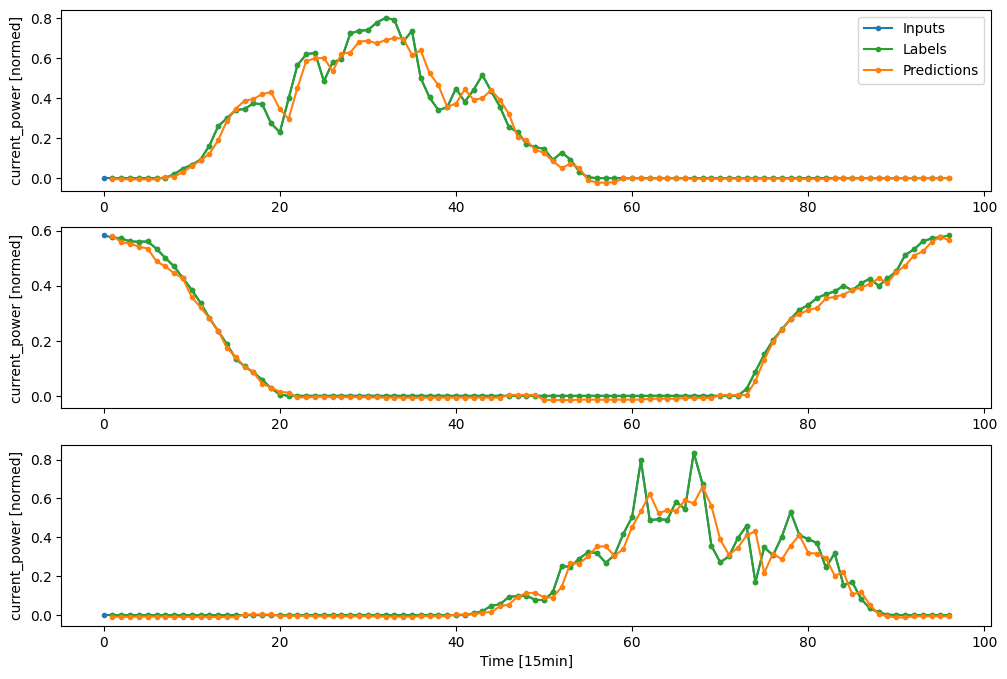

In [36]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

dense = load_or_train_model('dense_model', dense, wide_window)

val_performance['3-Dense'] = dense.evaluate(wide_window.val, return_dict=True)
performance['3-Dense'] = dense.evaluate(wide_window.test, verbose=0, return_dict=True)
wide_window.plot(dense)

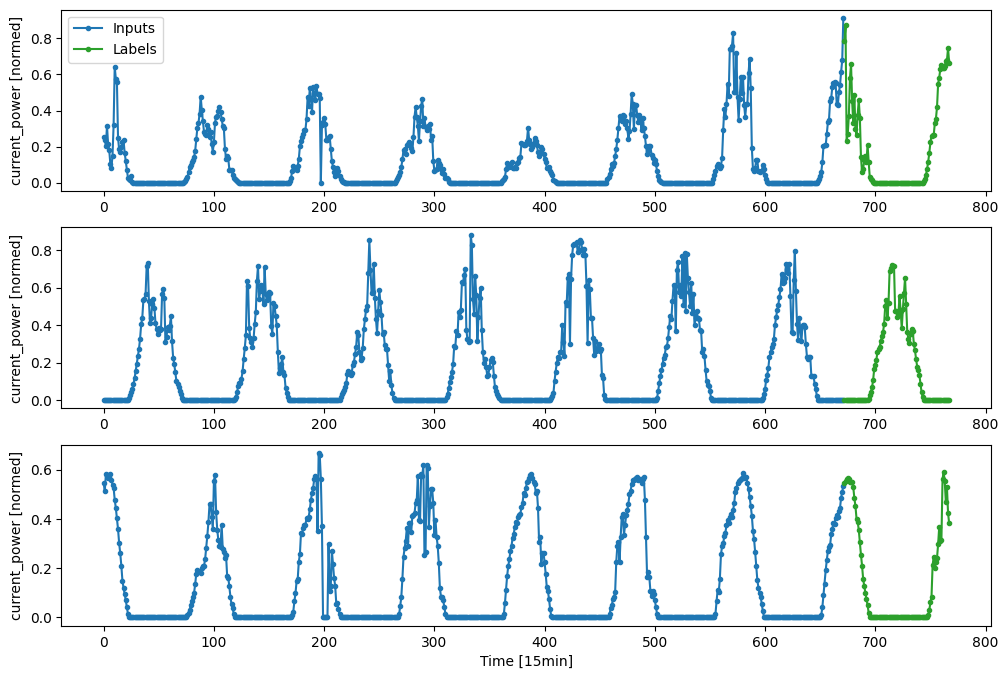

In [37]:
OUT_STEPS = 96
INPUT_STEPS = 672
multi_window = WindowGenerator(input_width=INPUT_STEPS,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=['current_power'])

multi_window.plot()

841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3204 - mean_absolute_error: 0.4674


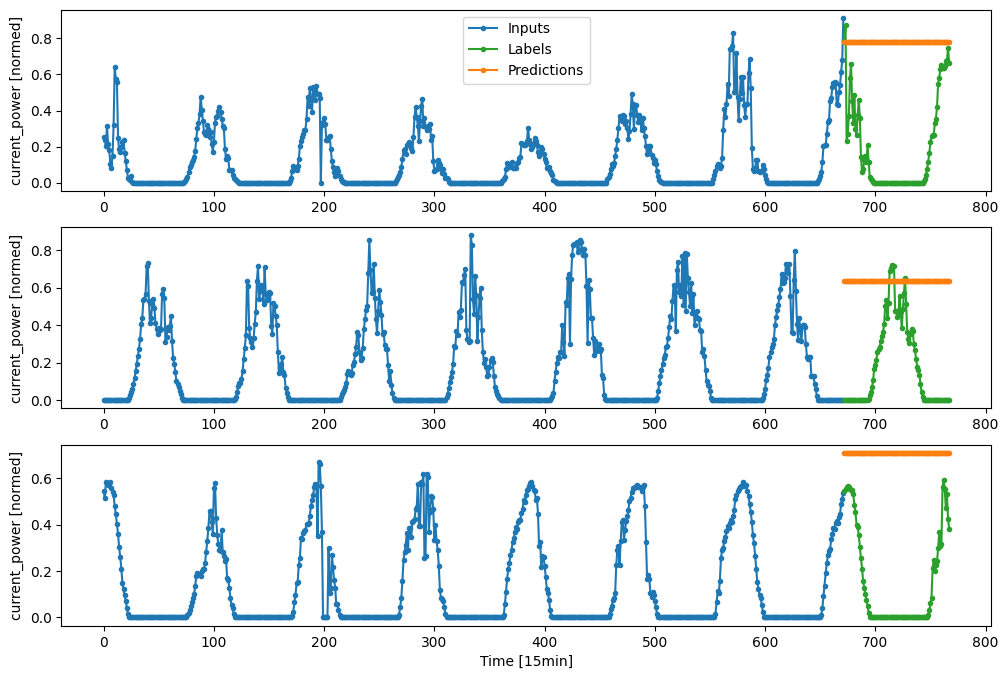

In [38]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance['A-Last'] = last_baseline.evaluate(multi_window.val, return_dict=True)
performance['A-Last'] = last_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(last_baseline)

841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0171 - mean_absolute_error: 0.0799


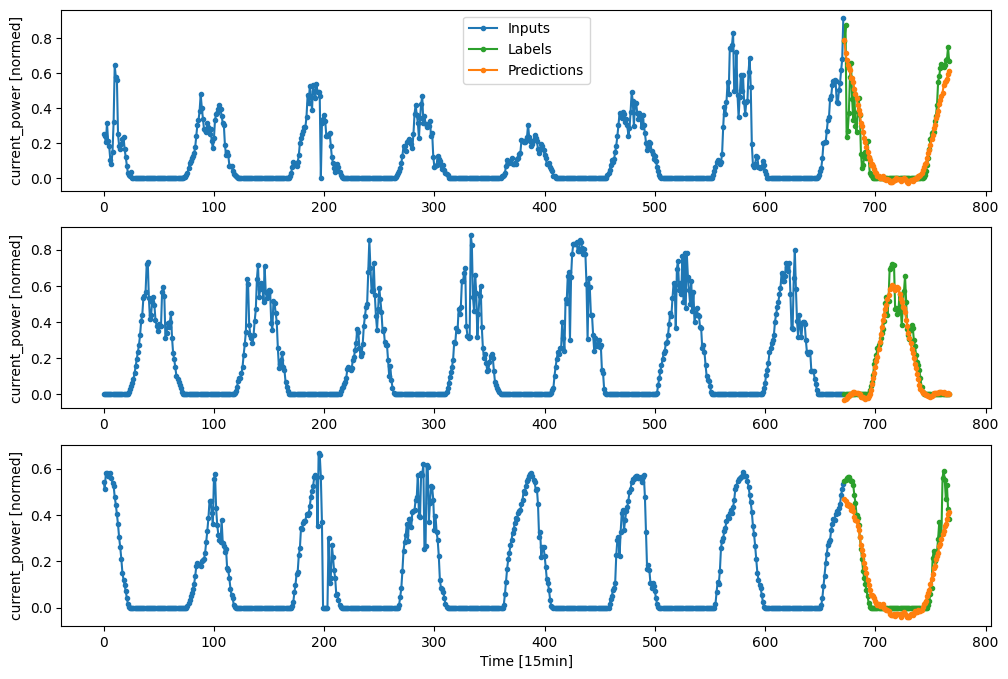

In [41]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Cropping1D(cropping=(INPUT_STEPS-CONV_WIDTH, 0)),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(128, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

multi_conv_model = load_or_train_model('multi_conv_model', multi_conv_model, multi_window)

IPython.display.clear_output()

val_performance['B-Conv'] = multi_conv_model.evaluate(multi_window.val, return_dict=True)
performance['B-Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_conv_model)

841/841 ━━━━━━━━━━━━━━━━━━━━ 111s 131ms/step - loss: 0.0086 - mean_absolute_error: 0.0492


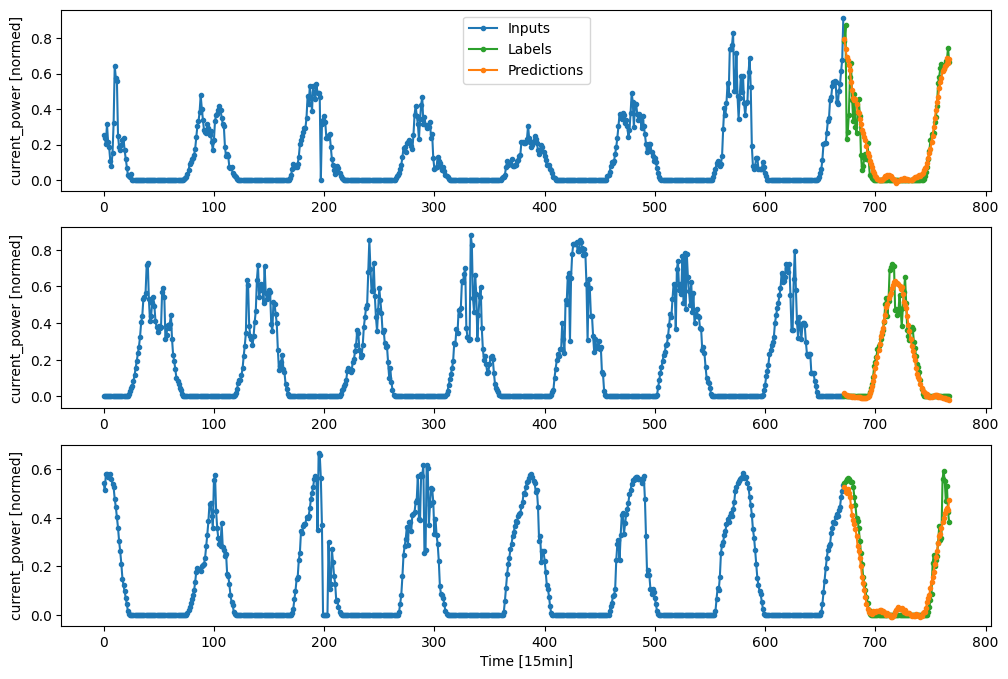

In [42]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(128, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

multi_lstm_model = load_or_train_model('multi_lstm_model', multi_lstm_model, multi_window)

IPython.display.clear_output()

val_performance['C-LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
performance['C-LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)

In [44]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

  def warmup(self, inputs):
    # inputs.shape => (batch, time, features)
    # x.shape => (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)

    # predictions.shape => (batch, features)
    prediction = self.dense(x)
    return prediction, state
  
  def call(self, inputs, training=None):
    # Use a TensorArray to capture dynamically unrolled outputs.
    predictions = []
    # Initialize the LSTM state.
    prediction, state = self.warmup(inputs)

    # Insert the first prediction.
    predictions.append(prediction)

    # Run the rest of the prediction steps.
    for n in range(1, self.out_steps):
        # Use the last prediction as input.
        x = prediction
        # Execute one lstm step.
        x, state = self.lstm_cell(x, states=state, training=training)
        
        # Convert the lstm output to a prediction.
        prediction = self.dense(x)
        # Add the prediction to the output.
        predictions.append(prediction)

    # predictions.shape => (time, batch, features)
    predictions = tf.stack(predictions)
    # predictions.shape => (batch, time, features)
    predictions = tf.transpose(predictions, [1, 0, 2])
    return predictions

In [48]:
feedback_model = FeedBack(units=128, out_steps=OUT_STEPS)

In [49]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 31])

In [50]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 96, 31)


In [52]:
feedback_model = load_or_train_model('feedback_model', feedback_model, multi_window, is_custom=True)

IPython.display.clear_output()

val_performance['D-AR LSTM'] = feedback_model.evaluate(multi_window.val, return_dict=True)
performance['D-AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(feedback_model)

→ Training model: feedback_model
Epoch 1/50
2568/2568 ━━━━━━━━━━━━━━━━━━━━ 1124s 435ms/step - loss: 0.0079 - mean_absolute_error: 0.0502 - val_loss: 0.0076 - val_mean_absolute_error: 0.0463
Epoch 2/50
1519/2568 ━━━━━━━━━━━━━━━━━━━━ 7:30 430ms/step - loss: 0.0061 - mean_absolute_error: 0.0414

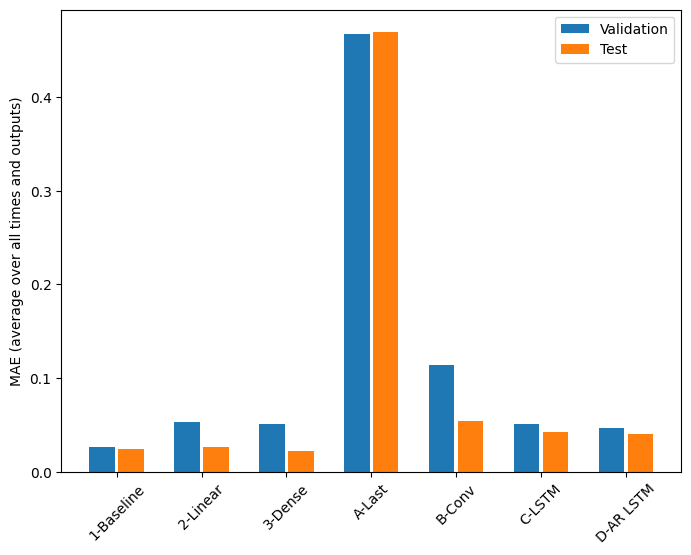

In [53]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(), rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [54]:
print('Validation performance:')
for name, value in val_performance.items():
  print(f'{name:8s}: {value[metric_name]:0.4f}')

Validation performance:
1-Baseline: 0.0269
2-Linear: 0.0531
3-Dense : 0.0512
A-Last  : 0.4677
B-Conv  : 0.1136
C-LSTM  : 0.0509
D-AR LSTM: 0.0462


In [55]:
print('\nTest performance:')
for name, value in performance.items():
  print(f'{name:8s}: {value[metric_name]:0.4f}')


Test performance:
1-Baseline: 0.0244
2-Linear: 0.0262
3-Dense : 0.0225
A-Last  : 0.4698
B-Conv  : 0.0538
C-LSTM  : 0.0426
D-AR LSTM: 0.0399
